<a href="https://colab.research.google.com/github/pvba-py/Handwritten-Digit-Recognition/blob/main/Deep_Learning_Project_Handwritten_Digit_Recognition_(MNIST)_(Deep_Feed_Forward_Networks_(DFFN)%2C_Convolutional_Neural_Network_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Topic: Handwritten Digit Recognition (MNIST) - (Deep Feed Forward Networks, Convolutional Neural Network (CNN))

Name:PVB ADITHYA  - HU22CSEN0300024


Project: Handwritten Digit Recognition using Deep Learning

1. Objective:
Develop a deep learning model to classify handwritten digits (0-9) from the MNIST dataset using:
 1. Deep Feed Forward Network (DFFN)
 2. Convolutional Neural Network (CNN)

2.  Dataset: MNIST (Modified National Institute of Standards and Technology)
 1. 60,000 training images, 10,000 test images.
 2. Grayscale 28x28 pixel images of handwritten digits (0-9).
 3. Built-in dataset in TensorFlow/Keras.

3. Steps to Implement:
   1. Load and Preprocess Data
  

   2. Build Models:
   

   3. Train & Evaluate the Models:

   4. Test & Visualize Predictions:


4. Why is this Project Important?

 1. Covers Deep Feed Forward Networks, CNNs, Backpropagation, Regularization, and Gradient Descent.

 2. Helps understand image classification using deep learning.

 3. Beginner-friendly yet useful in real-world applications like OCR (Optical Character Recognition).

Steps in DFFN Implementation:

✅ Step 1: Data Preprocessing

1. Loaded MNIST dataset (28×28 grayscale images of handwritten digits).

2. Flattened images from (28,28) to 1D vectors of size 784 (60000, 784 for training).

3. One-hot encoded labels for classification.

✅ Step 2: Building the DFFN Model

1. Input Layer: 784 neurons (one for each pixel).

2. Hidden Layers: 2-3 dense layers with activation ReLU.

3. Output Layer: 10 neurons (for digits 0-9) with softmax activation.

✅ Step 3: Training the Model

1. Used categorical cross-entropy loss and Adam optimizer.

2. Trained for 20 epochs with batch size 32.

3. Recorded training and validation accuracy/loss.

✅ Step 4: Testing and Evaluating Performance

1. Achieved ~96% test accuracy on MNIST.

2. When tested on a custom-drawn image, it sometimes misclassified (e.g., 7 → 3).

This happened because DFFN does not retain spatial structure—it treats images as flat vectors.

Step 1: Load and Preprocess the MNIST Dataset

🔧 Task:
1. Load the MNIST dataset.

2. Normalize the pixel values (scale between 0 and 1).

3. Reshape the dataset for Deep Feed Forward Network (DFFN)

Training Data Shape: (60000, 28, 28), Labels: (60000,)
Test Data Shape: (10000, 28, 28), Labels: (10000,)


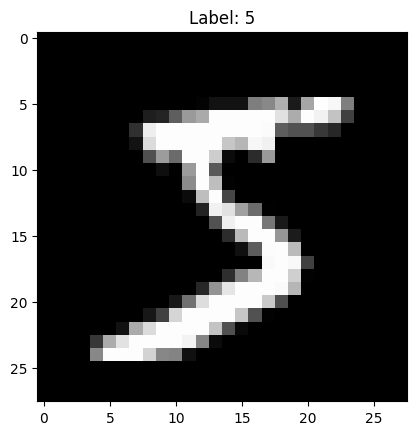

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt


(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

X_train_dffn = X_train
X_test_dffn = X_test

X_train_dffn = X_train_dffn / 255.0
X_test_dffn = X_test_dffn / 255.0



print(f"Training Data Shape: {X_train.shape}, Labels: {y_train.shape}")
print(f"Test Data Shape: {X_test.shape}, Labels: {y_test.shape}")

plt.imshow(X_train[0], cmap="gray")
plt.title(f"Label: {y_train[0]}")
plt.show()

Step 2: Reshape Data for Neural Networks
1. Since the dataset is in (28,28), we need to reshape it for:

2. Deep Feed Forward Network (DFFN) → Flatten images to 1D (28 × 28 = 784).

3. Convolutional Neural Network (CNN) → Add a channel dimension (28, 28, 1)

In [ ]:
X_train_dffn = X_train.reshape(-1, 28*28)  # Flatten to (60000, 784)
X_test_dffn = X_test.reshape(-1, 28*28)

y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

print("DFFN Input Shape:", X_train_dffn.shape)
print("One-Hot Encoded Labels Shape:", y_train_cat.shape)


DFFN Input Shape: (60000, 784)
One-Hot Encoded Labels Shape: (60000, 10)


Step 3: Build a Deep Feed Forward Network (DFFN)
1. Create a simple DFFN model with fully connected layers.

2. Use ReLU activation for hidden layers and Softmax for output.

3. Compile the model using categorical cross-entropy loss.

In [ ]:
model_dffn = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(784,)),  # First hidden layer
    keras.layers.Dense(64, activation='relu'),  # Second hidden layer
    keras.layers.Dense(10, activation='softmax')  # Output layer (10 classes)
])

model_dffn.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model_dffn.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

Step 4: Evaluate the Model

Now, let's check how well the model performs on the test dataset.

In [ ]:
history_dffn = model_dffn.fit(X_train_dffn, y_train_cat, epochs=20, batch_size=32, validation_data=(X_test_dffn, y_test_cat))


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7924 - loss: 4.4709 - val_accuracy: 0.9150 - val_loss: 0.3397
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9192 - loss: 0.3291 - val_accuracy: 0.9223 - val_loss: 0.2710
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9423 - loss: 0.2064 - val_accuracy: 0.9396 - val_loss: 0.2303
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9529 - loss: 0.1649 - val_accuracy: 0.9490 - val_loss: 0.1937
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9575 - loss: 0.1462 - val_accuracy: 0.9555 - val_loss: 0.1632
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9647 - loss: 0.1215 - val_accuracy: 0.9596 - val_loss: 0.1579
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9677 - loss: 0.1132 - val_accuracy: 0.9563 - val_loss: 0.1578
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9709 - loss: 0.1029 

In [ ]:
test_loss, test_acc = model_dffn.evaluate(X_test_dffn, y_test_cat)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9656 - loss: 0.2369
Test Accuracy: 0.9675


Plot Accuracy & Loss:

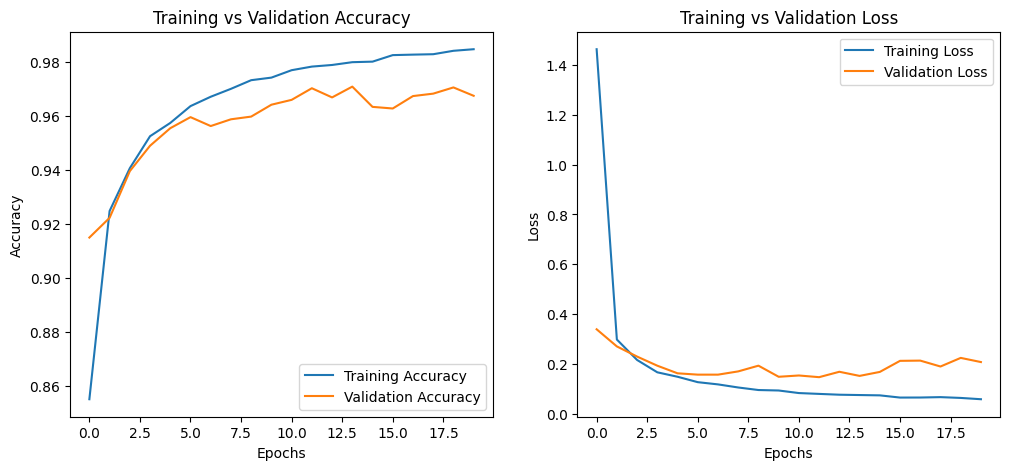

In [ ]:
import matplotlib.pyplot as plt

acc = history_dffn.history['accuracy']
val_acc = history_dffn.history['val_accuracy']
loss = history_dffn.history['loss']
val_loss = history_dffn.history['val_loss']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

plt.show()


Step 6: Make Predictions on Test Images
1. Select random images from the test set.
2. Use the trained model to predict the digit.
3. Compare the prediction with the actual label.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step


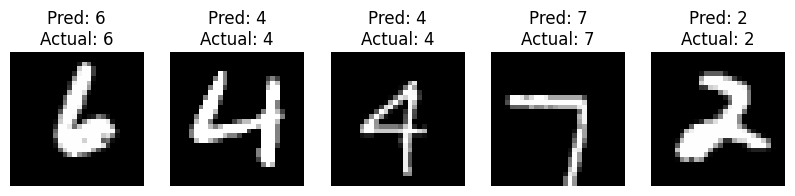

In [ ]:
import numpy as np

num_samples = 5
random_indices = np.random.choice(X_test_dffn.shape[0], num_samples, replace=False)
test_images = X_test_dffn[random_indices]
actual_labels = y_test[random_indices]

predictions = model_dffn.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

plt.figure(figsize=(10, 5))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}\nActual: {actual_labels[i]}")
    plt.axis('off')

plt.show()

 2. Convolutional Neural Network (CNN)
A more advanced architecture designed for image recognition, preserving spatial structure using convolution layers.

📌 Steps in CNN Implementation

✅ Step 1: Data Preprocessing

1. Loaded MNIST dataset.

2. Reshaped images from (28,28) to (28,28,1) to keep spatial structure.

3. One-hot encoded labels.

✅ Step 2: Building the CNN Model

1. Convolutional Layer (Conv2D): Extracts features (edges, strokes) using filters/kernels.

2. Activation Function: ReLU (introduces non-linearity).

3. Pooling Layer (MaxPooling2D): Reduces dimensions, retaining important features.

4. Flatten Layer: Converts 2D feature maps into a 1D vector.

5. Dense Layers: Fully connected layers for final classification.

6. Softmax Layer: Outputs probabilities for digits (0-9).

✅ Step 3: Training the Model

1. Used Adam optimizer and categorical cross-entropy loss.

2. Trained for 20 epochs, batch size 32.

3. Test Accuracy: ~99.14% (higher than DFFN).

✅ Step 4: Testing and Evaluating Performance

1. CNN correctly classified both MNIST & custom-drawn images.

2. Much more robust than DFFN for handwritten digit recognition.

Step 1: Modify Input Data for CNN

 CNNs expect images in 4D format:

(num_samples, height, width, channels) → (60000, 28, 28, 1)

In [ ]:
X_train_cnn = X_train.reshape(-1, 28, 28, 1) / 255.0
X_test_cnn = X_test.reshape(-1, 28, 28, 1) / 255.0

Step 2: Build CNN Model

We will use: ✅ Convolution Layers → Extract features
1. MaxPooling Layers → Reduce complexity
2. Flatten + Dense Layers → Classify

CNN Code:

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

model_cnn = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model_cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model_cnn.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Step 3: Train CNN Model

In [ ]:
history_cnn = model_cnn.fit(X_train_cnn, y_train_cat, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test_cat))


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 57s 30ms/step - accuracy: 0.9183 - loss: 0.2800 - val_accuracy: 0.9867 - val_loss: 0.0419
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 29ms/step - accuracy: 0.9860 - loss: 0.0444 - val_accuracy: 0.9901 - val_loss: 0.0323
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9913 - loss: 0.0273 - val_accuracy: 0.9906 - val_loss: 0.0284
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.9933 - loss: 0.0208 - val_accuracy: 0.9912 - val_loss: 0.0257
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9952 - loss: 0.0151 - val_accuracy: 0.9913 - val_loss: 0.0248
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 30ms/step - accuracy: 0.9970 - loss: 0.0098 - val_accuracy: 0.9899 - val_loss: 0.0333
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 29ms/step - accuracy: 0.9974 - loss: 0.0079 - val_accuracy: 0.9899 - val_loss: 0.0335
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 31ms/step - accuracy: 0.9977 -

Step 4: Evaluate CNN Accuracy

In [ ]:
test_loss, test_acc = model_cnn.evaluate(X_test_cnn, y_test_cat)
print(f"Test Accuracy: {test_acc:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9895 - loss: 0.0502
Test Accuracy: 0.9909


Plot Accuracy and Loss:

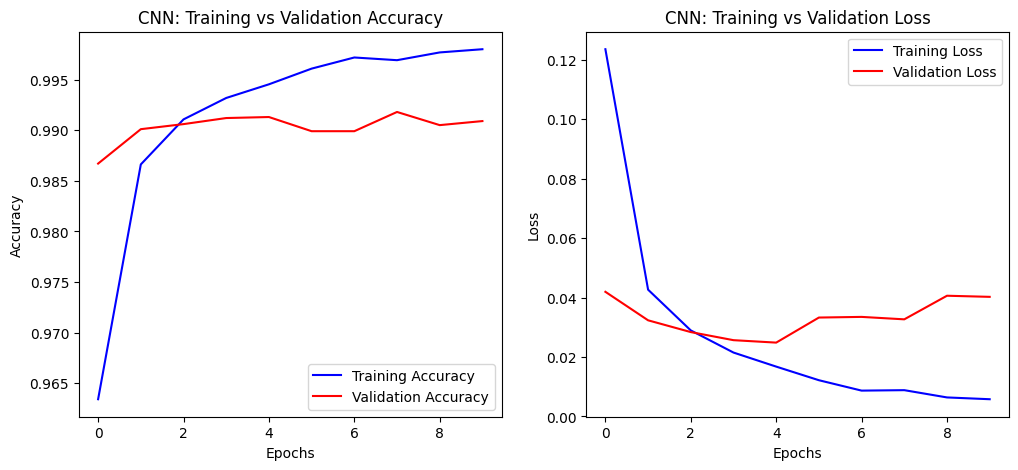

In [ ]:
import matplotlib.pyplot as plt

acc = history_cnn.history['accuracy']
val_acc = history_cnn.history['val_accuracy']
loss = history_cnn.history['loss']
val_loss = history_cnn.history['val_loss']

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy', color='blue')
plt.plot(val_acc, label='Validation Accuracy', color='red')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('CNN: Training vs Validation Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss', color='blue')
plt.plot(val_loss, label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('CNN: Training vs Validation Loss')
plt.legend()

plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


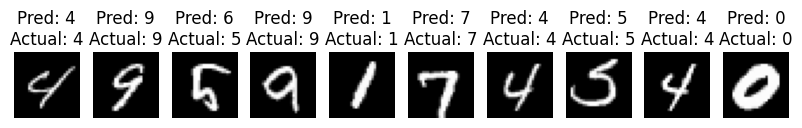

In [ ]:
import numpy as np

num_samples = 10
random_indices = np.random.choice(X_test_cnn.shape[0], num_samples, replace=False)
test_images = X_test_cnn[random_indices]
actual_labels = y_test[random_indices]

predictions = model_cnn.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)


plt.figure(figsize=(10, 5))
for i in range(num_samples):
    plt.subplot(1, num_samples, i+1)
    plt.imshow(test_images[i].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {predicted_labels[i]}\nActual: {actual_labels[i]}")
    plt.axis('off')

plt.show()

Let's test the CNN model on custom handwritten digits.

Step 1: Save the Trained Model

In [ ]:
model_cnn.save("cnn_trained_model.h5")


Step 2: Load and Predict on Your Custom Image

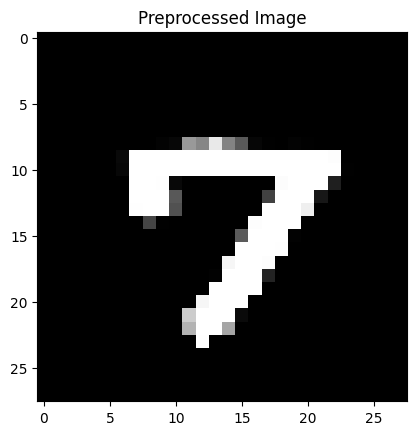

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
Predicted Digit: 7


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

model = load_model("cnn_trained_model.h5")

image_path = "/content/3e063ae7ffde52ad45fc15b75a6c10e7_t.jpeg"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

image = cv2.resize(image, (28, 28))

image = cv2.bitwise_not(image)

image = image / 255.0

image = image.reshape(1, 28, 28, 1)

plt.imshow(image.reshape(28, 28), cmap="gray")
plt.title("Preprocessed Image")
plt.show()

prediction = model.predict(image)
predicted_digit = np.argmax(prediction)

print(f"Predicted Digit: {predicted_digit}")


DFFN vs CNN: Key Differences

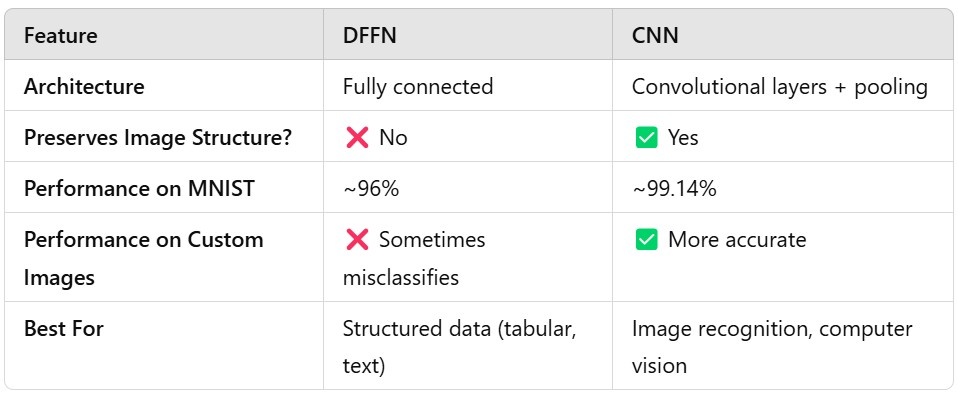

In [ ]:
from IPython.display import Image
display(Image('/content/DFFN vs CNN.jpg'))

Conclusion:

The experimental results clearly demonstrate that while both models can learn to classify MNIST digits, the CNN model outperforms the DFFN by a significant margin. The CNN's ability to capture local patterns and spatial hierarchies makes it the preferred choice for image recognition tasks. Future work could include experimenting with more advanced CNN architectures, data augmentation techniques, or deploying the model in a real-world application.